<a href="https://colab.research.google.com/github/CamiloVga/CV_APP/blob/main/Borr2_Clase_4_Regresiones_y_regularizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤖 Inteligencia Artificial Aplicada para la Economía
## Universidad Nacional de Colombia

### 👨‍🏫 Profesores
- **Profesor Magistral:** [Camilo Vega Barbosa](https://www.linkedin.com/in/camilo-vega-169084b1/)
- **Asistente de Docencia:** [Sergio Julian Zona Moreno](https://www.linkedin.com/in/sergio-julian-zona-moreno/)

## 📊 Regresiones, Regularización y Métricas de Evaluación

Este notebook explora los conceptos fundamentales de regresión lineal y logística, técnicas de regularización (Ridge y Lasso), y diferentes métricas de evaluación para modelos de machine learning. Implementaremos estos conceptos usando scikit-learn y visualizaremos los resultados con matplotlib y seaborn.

### Objetivos:
- Implementar regresión lineal y logística
- Aplicar técnicas de regularización
- Evaluar modelos usando diferentes métricas
- Visualizar y comparar resultados

### Requisitos de Software:
- Conocimientos básicos de Python
- Familiaridad con NumPy y Pandas
- Comprensión básica de conceptos estadísticos

### Requisitos Técnicos:
- **Token de Hugging Face**: Necesario para acceder al dataset. Puedes obtener tu token en [Hugging Face](https://huggingface.co/settings/tokens)
- **Entorno de Ejecución**:
  - Recomendado: GPU T4 (Cambiar en: Runtime -> Change runtime type -> GPU)
  - Alternativa: CPU (el código funcionará, pero será más lento)
- **Memoria RAM**: Mínimo 4GB recomendados
- **Espacio en Disco**: ~200 GB para datasets y modelos

💡 **Nota**: Aunque recomendamos usar GPU para mayor velocidad, todo el código es compatible con CPU y funcionará correctamente, solo que tomará más tiempo en ejecutarse.

## 🛠️ Instalaciones Necesarias

Antes de comenzar, necesitamos instalar algunas librerías específicas para nuestro análisis. A continuación se listan las librerías y su propósito:

### Manejo de Datos y Cálculos
- **pandas**: Manipulación y análisis de datos
- **numpy**: Operaciones numéricas y matrices
- **scipy**: Funciones científicas y estadísticas

### Hugging Face
- **huggingface_hub**: Acceso a modelos y datasets de Hugging Face
- **datasets**: Manejo eficiente de datasets de Hugging Face

### Visualización
- **matplotlib**: Gráficos básicos y personalización
- **seaborn**: Visualizaciones estadísticas avanzadas
- **plotly**: Gráficos interactivos
- **yellowbrick**: Visualizadores específicos para machine learning

### Machine Learning
- **scikit-learn**: Algoritmos de ML y métricas
- **imbalanced-learn**: Manejo de datos desbalanceados

### Utilidades
- **tqdm**: Barras de progreso para procesos largos
- **joblib**: Paralelización de procesos

Ejecutemos la celda de código siguiente para instalar todas las librerías necesarias. La flag -q asegura una instalación silenciosa para mantener limpia la salida.

In [ ]:
# Instalación silenciosa de librerías
!pip install -q pandas numpy scipy matplotlib seaborn plotly yellowbrick scikit-learn \
    imbalanced-learn tqdm joblib huggingface_hub datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


## 📊 Base de Datos: Default of Credit Card Clients

Para este ejercicio usaremos la base de datos "Default of Credit Card Clients" disponible en [Hugging Face](https://huggingface.co/datasets/scikit-learn/credit-card-clients), originalmente obtenida del repositorio UCI Machine Learning.

## 📝 Descripción
Esta base de datos contiene información sobre incumplimientos de pago, factores demográficos, datos crediticios, historial de pagos y estados de cuenta de clientes de tarjetas de crédito en Taiwán durante el período de abril a septiembre de 2005.

## 🔍 Variables Disponibles
La base contiene 25 variables:

### Información Personal
- **ID**: Identificador único de cada cliente
- **LIMIT_BAL**: Monto de crédito otorgado en dólares NT (incluye crédito individual y familiar)
- **SEX**: Género (1=masculino, 2=femenino)
- **EDUCATION**: Nivel educativo
 - 1 = Posgrado
 - 2 = Universidad
 - 3 = Secundaria
 - 4 = Otros
 - 5,6 = Desconocido
- **MARRIAGE**: Estado civil (1=casado, 2=soltero, 3=otros)
- **AGE**: Edad en años

### Historial de Pagos
- **PAY_0** a **PAY_6**: Estado de pago mensual (de septiembre a abril 2005)
 - -1 = Pago a tiempo
 - 1 = Retraso de un mes
 - 2 = Retraso de dos meses
 - ...
 - 9 = Retraso de nueve meses o más

### Estados de Cuenta
- **BILL_AMT1** a **BILL_AMT6**: Monto facturado mensual (septiembre a abril 2005)
- **PAY_AMT1** a **PAY_AMT6**: Monto pagado mensual (septiembre a abril 2005)

### Variable Objetivo
- **default.payment.next.month**: Incumplimiento de pago (1=sí, 0=no)

## 🎯 Objetivo
Utilizaremos esta base de datos para:
1. Predecir la probabilidad de incumplimiento de pago
2. Identificar los factores más importantes que influyen en el incumplimiento
3. Evaluar diferentes técnicas de regularización para mejorar nuestras predicciones
4. Analizar métricas de evaluación para modelos de clasificación

## 💡 Consideraciones
- Los montos están en dólares taiwaneses (NT)
- Los datos incluyen tanto variables numéricas como categóricas
- Es un problema de clasificación binaria (incumplimiento sí/no)
- Existe un desbalance natural en las clases (más pagos a tiempo que incumplimientos)

### Construcción de la base de datos

Por medio de la función streaming, vamos a tomar 10.000 datos aleatorios de la base de datos de HuggingFace. Posteriormente, vamos a estudiar los datos y su naturaleza.

In [2]:
#Analisis inicial de datos
!pip install datasets
# Importamos las librerías necesarias
import pandas as pd
from datasets import load_dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos el dataset y lo mezclamos
dataset = load_dataset("scikit-learn/credit-card-clients", streaming=True)
df = pd.DataFrame(list(dataset['train'].shuffle(seed=42).take(10000)))

# 1. Examinamos la información básica del DataFrame
print("\n=== Información del DataFrame ===")
print(df.info())

# 2. Verificamos los tipos de datos y valores únicos para cada columna
print("\n=== Valores únicos por columna ===")
for column in df.columns:
    print(f"\n{column}:")
    print(f"Tipo de dato: {df[column].dtype}")
    print(f"Valores únicos: {df[column].nunique()}")
    print(f"Primeros valores únicos: {sorted(df[column].unique())[:5]}")

# 3. Verificamos valores nulos
print("\n=== Valores nulos ===")
print(df.isnull().sum())

# 4. Estadísticas descriptivas básicas
print("\n=== Estadísticas descriptivas ===")
print(df.describe())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


README.md:   0%|          | 0.00/2.64k [00:00<?, ?B/s]


=== Información del DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          10000 non-null  int64  
 1   LIMIT_BAL                   10000 non-null  float64
 2   SEX                         10000 non-null  int64  
 3   EDUCATION                   10000 non-null  int64  
 4   MARRIAGE                    10000 non-null  int64  
 5   AGE                         10000 non-null  int64  
 6   PAY_0                       10000 non-null  int64  
 7   PAY_2                       10000 non-null  int64  
 8   PAY_3                       10000 non-null  int64  
 9   PAY_4                       10000 non-null  int64  
 10  PAY_5                       10000 non-null  int64  
 11  PAY_6                       10000 non-null  int64  
 12  BILL_AMT1                   10000 non-null  int64  
 1

In [5]:
# Funciones de Preprocesamiento de datos

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

def categorize_features(df):
    """
    Separa las características en numéricas y categóricas.
    """
    # Variables numéricas (montos y edad)
    numeric_features = [
        'LIMIT_BAL', 'AGE',
        'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
        'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
    ]

    # Variables categóricas
    categorical_features = [
        'SEX', 'EDUCATION', 'MARRIAGE',
        'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
    ]

    return numeric_features, categorical_features

def clean_categorical_data(df):
    """
    Limpia y corrige valores en variables categóricas.
    """
    df = df.copy()

    # Corregir valores en EDUCATION
    # 0, 5 y 6 son valores no definidos, los convertimos a 4 (Others)
    df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)

    # Corregir valores en MARRIAGE
    # 0 es un valor no definido, lo convertimos a 3 (Others)
    df['MARRIAGE'] = df['MARRIAGE'].replace([0], 3)

    return df

def preprocess_data(df, random_state=42):
    """
    Realiza el preprocesamiento completo de los datos.
    """
    # 1. Separar features
    numeric_features, categorical_features = categorize_features(df)

    # 2. Limpiar datos categóricos
    df = clean_categorical_data(df)

    # 3. Estandarizar variables numéricas
    scaler = StandardScaler()
    df[numeric_features] = scaler.fit_transform(df[numeric_features])

    # 4. Codificar variables categóricas
    label_encoders = {}
    for feature in categorical_features:
        label_encoders[feature] = LabelEncoder()
        df[feature] = label_encoders[feature].fit_transform(df[feature].astype(str))

    # 5. Separar features y target
    X = df.drop('default.payment.next.month', axis=1)
    y = df['default.payment.next.month']

    # 6. Dividir en train y test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=random_state,
        stratify=y
    )

    # 7. Guardar información del preprocesamiento
    preprocessing_info = {
        'numeric_features': numeric_features,
        'categorical_features': categorical_features,
        'scaler': scaler,
        'label_encoders': label_encoders
    }

    return X_train, X_test, y_train, y_test, preprocessing_info

def print_preprocessing_summary(X_train, X_test, y_train, y_test):
    """
    Imprime un resumen del preprocesamiento.
    """
    print("\n=== Resumen del Preprocesamiento ===")
    print(f"Dimensiones de X_train: {X_train.shape}")
    print(f"Dimensiones de X_test: {X_test.shape}")

    print("\nDistribución de clases:")
    print("\nConjunto de entrenamiento:")
    print(pd.Series(y_train).value_counts(normalize=True).round(3))
    print("\nConjunto de prueba:")
    print(pd.Series(y_test).value_counts(normalize=True).round(3))

    print("\nEstadísticas de algunas variables numéricas (conjunto de entrenamiento):")
    print(X_train.describe().round(2).head())

In [6]:
#Preprocesamiento

# Importar y cargar datos
from datasets import load_dataset
import pandas as pd

# 1. Cargar datos
dataset = load_dataset("scikit-learn/credit-card-clients", streaming=True)
df = pd.DataFrame(list(dataset['train'].shuffle(seed=42).take(10000)))

# 2. Aplicar preprocesamiento
X_train, X_test, y_train, y_test, preprocessing_info = preprocess_data(df)

# 3. Imprimir resumen
print_preprocessing_summary(X_train, X_test, y_train, y_test)

# 4. Verificar las características procesadas
print("\n=== Características procesadas ===")
print("\nCaracterísticas numéricas:")
print(preprocessing_info['numeric_features'])
print("\nCaracterísticas categóricas:")
print(preprocessing_info['categorical_features'])


=== Resumen del Preprocesamiento ===
Dimensiones de X_train: (8000, 24)
Dimensiones de X_test: (2000, 24)

Distribución de clases:

Conjunto de entrenamiento:
default.payment.next.month
0    0.776
1    0.224
Name: proportion, dtype: float64

Conjunto de prueba:
default.payment.next.month
0    0.776
1    0.224
Name: proportion, dtype: float64

Estadísticas de algunas variables numéricas (conjunto de entrenamiento):
            ID  LIMIT_BAL      SEX  EDUCATION  MARRIAGE      AGE    PAY_0  \
count  8000.00    8000.00  8000.00    8000.00   8000.00  8000.00  8000.00   
mean   5040.86      -0.01     0.58       0.81      0.58    -0.00     1.88   
std    2968.08       1.00     0.49       0.73      0.52     1.00     1.28   
min       1.00      -1.20     0.00       0.00      0.00    -1.54     0.00   
25%    2483.75      -0.89     0.00       0.00      0.00    -0.79     1.00   

         PAY_2    PAY_3    PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
count  8000.00  8000.00  8000.00  ...    800

📊 Distribución de la variable objetivo (default.payment.next.month):

Porcentajes:
Clase 0: 77.56%
Clase 1: 22.44%


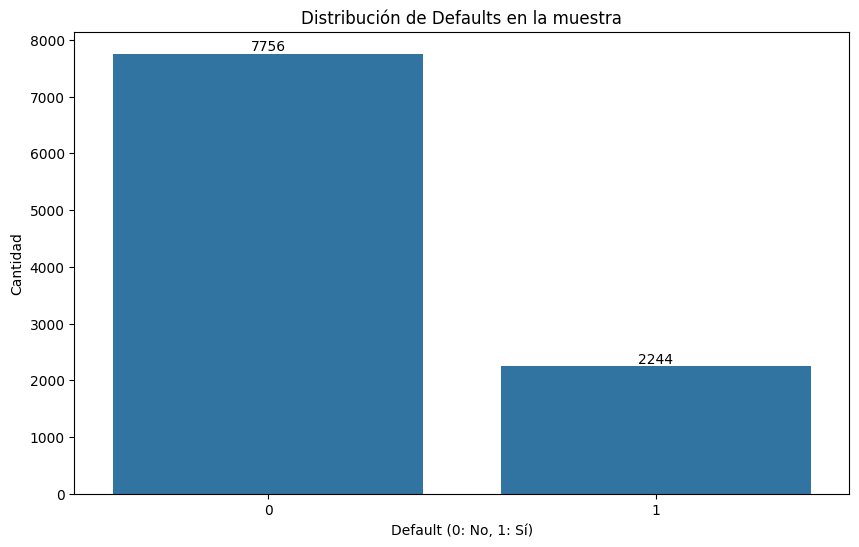

In [7]:
# Analizamos la distribución de la variable objetivo
print("📊 Distribución de la variable objetivo (default.payment.next.month):")
class_dist = df['default.payment.next.month'].value_counts(normalize=True)
print("\nPorcentajes:")
for clase, porcentaje in class_dist.items():
    print(f"Clase {clase}: {porcentaje*100:.2f}%")

# Visualizamos la distribución con un gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='default.payment.next.month')
plt.title('Distribución de Defaults en la muestra')
plt.xlabel('Default (0: No, 1: Sí)')
plt.ylabel('Cantidad')

# Añadimos los valores exactos sobre cada barra
for i in plt.gca().containers[0]:
    plt.text(i.get_x() + i.get_width()/2,
            i.get_height(),
            f'{int(i.get_height())}',
            ha='center', va='bottom')

plt.show()

## Preparación para el entrenamiento


### Preparación datos para el entrenamiento

En el proceso de machine learning, la división de datos en conjuntos de **entrenamiento y prueba **es un paso crítico que simula cómo un modelo aprenderá y será evaluado en situaciones del mundo real.

No existe una proporción ideal para dividir los datos. Pero se optará por 80% para entrenamiento y 20% prueba.


**Inputs y Output**:

Características (X):

Representan las variables de entrada que utilizaremos para predecir
En nuestro dataset de tarjetas de crédito, incluyen información como límite de crédito, edad, historial de pagos, etc.


Variable Objetivo (y):

El valor que queremos predecir
En este caso, "default.payment.next.month" (si un cliente incumplirá o no el pago)

In [8]:
from sklearn.model_selection import train_test_split

# Parámetros importantes
X = df.drop('default.payment.next.month', axis=1)  # Características
y = df['default.payment.next.month']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(
    X,              # Características
    y,              # Variable objetivo
    test_size=0.2,  # 20% de los datos para prueba, 80% para entrenamiento
    random_state=42 # Semilla aleatoria para reproducibilidad
)

In [9]:
# Fijar semilla aleatoria para reproducibilidad

import numpy as np

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

#Entrenamiento

Ahora que hemos preparado nuestros datos, estamos listos para comenzar el entrenamiento de los modelos de aprendizaje automático. El objetivo principal es predecir la probabilidad de que un cliente incumpla con el pago de su tarjeta de crédito en el próximo mes.


En este script, vamos a entrenar tres modelos de regresión logística diferentes:

- **Regresión Logística Básica (Logit)**: Un modelo de clasificación binaria que predice la probabilidad de incumplimiento sin ningún tipo de regularización.
- **Regresión Logística con Regularización L2 (Logit-Ridge**): Una variación del modelo anterior que aplica regularización Ridge, la cual penaliza los coeficientes grandes y puede ayudar a evitar el sobreajuste.
- **Regresión Logística con Regularización L1 (Logit-Lasso)**: Otra versión que utiliza la regularización Lasso, la cual puede llevar a la eliminación de características menos relevantes, facilitando la interpretación del modelo.

Mediante la comparación de estos tres modelos, podremos evaluar cómo las diferentes técnicas de regularización afectan el rendimiento y la capacidad predictiva del modelo. Esto nos permitirá encontrar el enfoque más apropiado para este problema de predicción de incumplimiento de pagos.

In [12]:
# Importar la clase necesaria
from sklearn.linear_model import LogisticRegression


# Inicializar y entrenar modelos
models = {
    # Modelo básico sin regularización
    # Este modelo puede sobreajustarse si hay muchas características
    "Logit Básico": LogisticRegression(
        random_state=RANDOM_STATE
    ),

    # Modelo con regularización L2 (Ridge)
    # La regularización Ridge (L2) penaliza coeficientes grandes al cuadrado
    # Es útil cuando todas las características son importantes pero queremos reducir su impacto
    "Logit Ridge": LogisticRegression(
        penalty='l2',          # Tipo de regularización: L2 (suma de cuadrados)
        C=1.0,                # Inverso de la fuerza de regularización:
                             # - C grande (ej: 10.0): regularización débil, puede sobreajustar
                             # - C pequeño (ej: 0.1): regularización fuerte, puede subajustar
        random_state=RANDOM_STATE
    ),

    # Modelo con regularización L1 (Lasso)
    # La regularización Lasso (L1) puede hacer que algunos coeficientes sean exactamente 0
    # Es útil para selección de características, eliminando las menos importantes
    "Logit Lasso": LogisticRegression(
        penalty='l1',          # Tipo de regularización: L1 (valor absoluto)
        solver='liblinear',    # Necesario para L1, ya que no todos los solvers la soportan
        C=1.0,                # Mismo concepto que en Ridge:
                             # - C grande: más características se mantienen
                             # - C pequeño: más características se vuelven 0
        random_state=RANDOM_STATE
    )
}

# Diccionarios para almacenar resultados
predictions = {}      # Almacenará las predicciones (0 o 1)
probabilities = {}    # Almacenará las probabilidades [0,1]

# Entrenar modelos y generar predicciones
for name, model in models.items():
    # Entrenamiento del modelo
    model.fit(X_train, y_train)

    # Realizar predicciones
    predictions[name] = model.predict(X_test)

    # Calcular probabilidades de la clase positiva (default)
    probabilities[name] = model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# 📊 Análisis de Desempeño de Modelos de Clasificación de Riesgo Crediticio

En este análisis, estamos evaluando tres modelos de regresión logística para predecir el riesgo de incumplimiento de pagos en tarjetas de crédito. Los modelos que comparamos son:
- Regresión Logística Básica (sin regularización)
- Regresión Logística con Regularización Ridge (L2)
- Regresión Logística con Regularización Lasso (L1)

## Métricas de Evaluación
Para evaluar el desempeño de nuestros modelos, utilizamos varias métricas clave:

### Matriz de Confusión
Nos muestra cuatro categorías fundamentales de predicción:
- **Verdaderos Negativos (VN)**: Clientes correctamente identificados como no morosos
- **Falsos Positivos (FP)**: Clientes erróneamente clasificados como morosos
- **Falsos Negativos (FN)**: Clientes morosos no detectados
- **Verdaderos Positivos (VP)**: Clientes morosos correctamente identificados

### Métricas Derivadas
- **Accuracy**: (VN + VP)/(Total) - Proporción total de predicciones correctas
- **Precision**: VP/(VP + FP) - De los clientes clasificados como morosos, cuántos realmente lo son
- **Recall**: VP/(VP + FN) - Del total de clientes morosos, cuántos detectamos correctamente
- **F1-Score**: Media armónica entre Precision y Recall
- **Curva ROC y AUC**: Evalúa el balance entre la tasa de verdaderos positivos y falsos positivos

## Objetivo del Análisis
Buscamos determinar:
1. Qué modelo tiene mejor capacidad predictiva general
2. Cómo afecta la regularización al desempeño del modelo
3. El balance entre falsos positivos (costos de oportunidad perdidos) y falsos negativos (pérdidas por default)
4. La robustez de cada modelo en la identificación de casos de default

Este análisis es crucial para la toma de decisiones en la gestión de riesgo crediticio, donde los errores pueden ser costosos tanto para la institución financiera como para los clientes.


=== Tabla Comparativa de Métricas ===
      Modelo  Accuracy  Precision  Recall  F1-Score  AUC-ROC
Logit Básico    0.7635     0.0000  0.0000    0.0000   0.6115
 Logit Ridge    0.7635     0.0000  0.0000    0.0000   0.6115
 Logit Lasso    0.7895     0.6912  0.1987    0.3087   0.7075

=== Matrices de Confusión ===


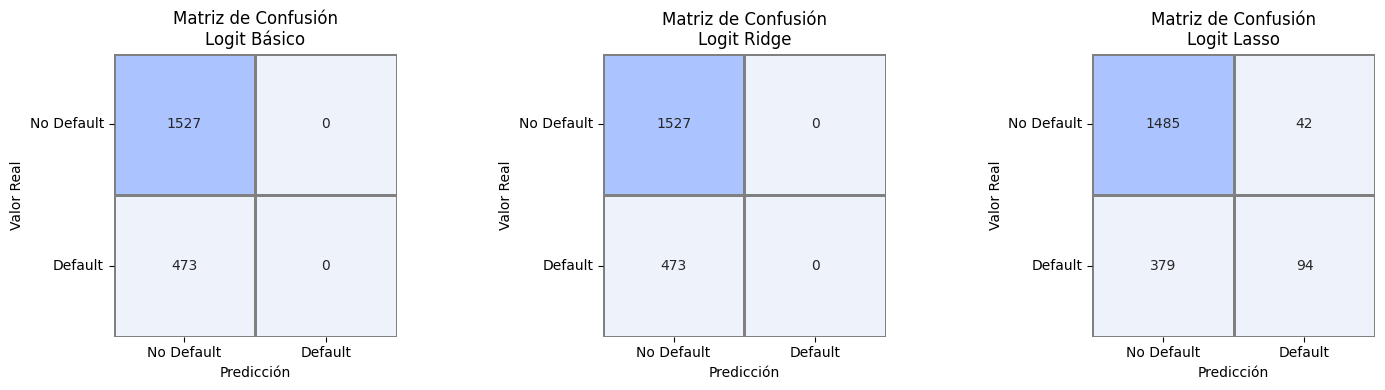

In [14]:
# --- Evaluación y Métricas ---
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_metrics_table(y_true, predictions):
    """
    Crea una tabla comparativa con todas las métricas de los modelos
    """
    metrics_dict = {
        'Modelo': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1-Score': [],
        'AUC-ROC': []
    }

    for name in predictions.keys():
        metrics_dict['Modelo'].append(name)
        metrics_dict['Accuracy'].append(accuracy_score(y_true, predictions[name]))
        metrics_dict['Precision'].append(precision_score(y_true, predictions[name], zero_division=0))
        metrics_dict['Recall'].append(recall_score(y_true, predictions[name]))
        metrics_dict['F1-Score'].append(f1_score(y_true, predictions[name]))
        metrics_dict['AUC-ROC'].append(roc_auc_score(y_true, probabilities[name]))

    return pd.DataFrame(metrics_dict).round(4)

def plot_confusion_matrices(y_true, predictions):
    """
    Visualiza las matrices de confusión para cada modelo con mejor contraste visual
    """
    n_models = len(predictions)
    fig, axes = plt.subplots(1, n_models, figsize=(5*n_models, 4))
    if n_models == 1:
        axes = [axes]

    # Configurar el estilo visual
    plt.style.use('default')

    # Definir un mapa de colores más contrastante
    colors = ["#EDF2FB", "#ABC4FF"]  # Desde celeste claro a azul medio
    cmap = sns.color_palette(colors, as_cmap=True)

    for idx, (name, y_pred) in enumerate(predictions.items()):
        cm = confusion_matrix(y_true, y_pred)

        # Crear matriz de confusión con seaborn
        sns.heatmap(cm,
                   annot=True,
                   fmt='d',
                   ax=axes[idx],
                   cmap=cmap,
                   cbar=False,
                   linewidths=1,     # Ancho de los bordes
                   linecolor='gray',  # Color de los bordes
                   square=True)       # Hacer las celdas cuadradas

        # Configurar títulos y etiquetas
        axes[idx].set_title(f'Matriz de Confusión\n{name}')
        axes[idx].set_xlabel('Predicción')
        axes[idx].set_ylabel('Valor Real')

        # Ajustar las etiquetas de los ejes
        axes[idx].set_xticklabels(['No Default', 'Default'])
        axes[idx].set_yticklabels(['No Default', 'Default'], rotation=0)

    plt.tight_layout()
    plt.show()

# Crear y mostrar tabla comparativa de métricas
metrics_table = create_metrics_table(y_test, predictions)
print("\n=== Tabla Comparativa de Métricas ===")
print(metrics_table.to_string(index=False))

# Visualizar matrices de confusión
print("\n=== Matrices de Confusión ===")
plot_confusion_matrices(y_test, predictions)

# Visualizar curvas ROC
print("\n=== Curvas ROC ===")
plot_roc_curves(y_test, probabilities)


=== Curvas ROC ===


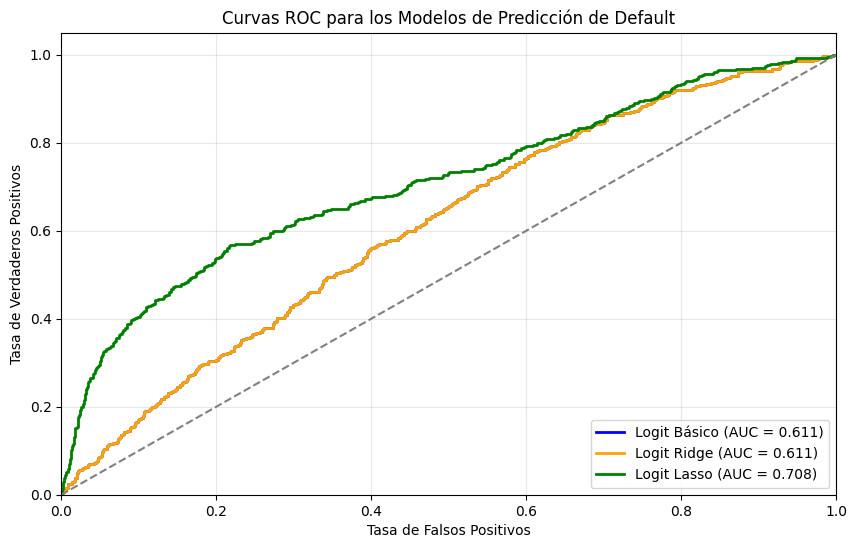

In [17]:
#Curva ROC-AUC

def plot_roc_curves(y_true, probabilities):
    """
    Visualiza las curvas ROC para múltiples modelos.

    Parámetros:
    -----------
    y_true : array-like
        Valores reales de las clases
    probabilities : dict
        Diccionario con las probabilidades predichas por cada modelo
    """
    plt.figure(figsize=(10, 6))

    # Colores para cada modelo
    colors = ['blue', 'orange', 'green']

    # Graficar la curva ROC para cada modelo
    for (name, probs), color in zip(probabilities.items(), colors):
        fpr, tpr, _ = roc_curve(y_true, probs)
        auc = roc_auc_score(y_true, probs)

        plt.plot(fpr, tpr, color=color, lw=2,
                label=f'{name} (AUC = {auc:.3f})')

    # Agregar la línea diagonal de referencia
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Configurar el gráfico
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curvas ROC para los Modelos de Predicción de Default')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)

    plt.show()

    # Visualizar curvas ROC
print("\n=== Curvas ROC ===")
plot_roc_curves(y_test, probabilities)

# 📊 Análisis de Resultados: Predicción de Default Crediticio

## 🎯 Comportamiento de los Modelos

### 🤔 Limitaciones de los Modelos Básicos
Al examinar los resultados, encontramos un fenómeno interesante: tanto el modelo logístico básico como el Ridge muestran exactamente el mismo comportamiento, prediciendo siempre "No Default". Aunque esto resulta en una precisión aparentemente buena del 76.35%, en realidad refleja un problema fundamental: los modelos simplemente están apostando a la clase mayoritaria, sin realmente aprender a identificar los casos de default.

Es importante entender por qué el modelo Ridge no está funcionando como esperaríamos. Con el parámetro actual C=1.0, la regularización L2 es demasiado débil. Y contrario a lo que podríamos pensar intuitivamente, aumentar C (por ejemplo, a 10 o 100) empeoraría el problema porque:

- 🔹 C es el inverso de la fuerza de regularización
- 🔹 C grande = regularización débil ≈ modelo básico sin regularización
- 🔹 C pequeño = regularización fuerte = lo que necesitamos

### 💡 El Mejor Desempeño del Lasso
El modelo Lasso muestra resultados más prometedores:
- ✅ Precisión del 69.12% en predicciones de default
- ✅ Detecta el 20% de los casos reales de default
- ✅ Mejor selección de características relevantes

Sin embargo, perder el 80% de los defaults reales indica que hay mucho espacio para mejora, especialmente considerando el alto costo de los falsos negativos en riesgo crediticio.



# Entropia

=== Análisis de Entropía ===

Entropía media para Logit Básico: 0.5256

Entropía media para Logit Ridge: 0.5256

Entropía media para Logit Lasso: 0.4778


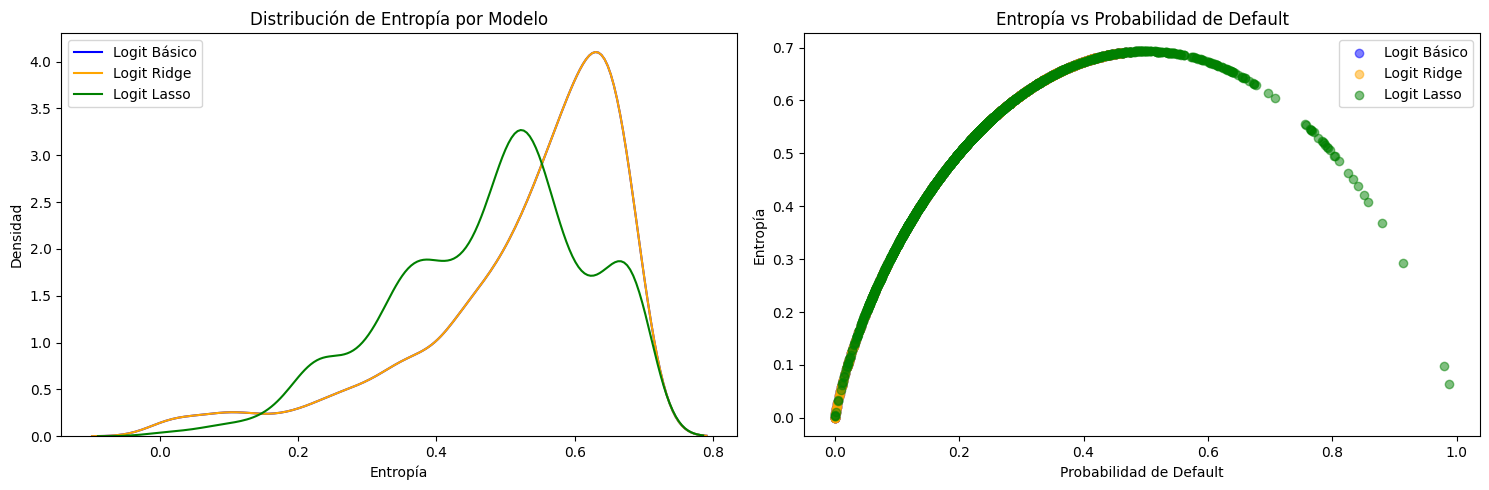


Entropía media por clase real:

Logit Básico:
Clase 0: 0.5122
Clase 1: 0.5686

Logit Ridge:
Clase 0: 0.5122
Clase 1: 0.5686

Logit Lasso:
Clase 0: 0.4566
Clase 1: 0.5464


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

def calculate_entropy(probabilities):
    """
    Calcula la entropía de las predicciones.
    probabilities: array de probabilidades de la clase positiva (default)
    """
    # Convertir a probabilidades de ambas clases
    p = np.vstack([1 - probabilities, probabilities]).T
    return entropy(p, axis=1)

def analyze_entropy(y_true, probabilities):
    """
    Analiza y visualiza la entropía de las predicciones de los modelos
    """
    # Calcular entropía para cada modelo
    entropy_dict = {}
    mean_entropy_dict = {}
    for name, probs in probabilities.items():
        entropy_vals = calculate_entropy(probs)
        entropy_dict[name] = entropy_vals
        mean_entropy_dict[name] = np.mean(entropy_vals)
        print(f"\nEntropía media para {name}: {mean_entropy_dict[name]:.4f}")

    # Crear subplot con dos gráficas
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # 1. Distribución de entropía
    colors = ['blue', 'orange', 'green']
    for (name, entropy_vals), color in zip(entropy_dict.items(), colors):
        sns.kdeplot(data=entropy_vals, label=name, ax=ax1, color=color)
    ax1.set_title('Distribución de Entropía por Modelo')
    ax1.set_xlabel('Entropía')
    ax1.set_ylabel('Densidad')
    ax1.legend()

    # 2. Entropía vs Probabilidad predicha
    for (name, entropy_vals), color in zip(entropy_dict.items(), colors):
        ax2.scatter(probabilities[name], entropy_vals,
                   alpha=0.5, label=name, color=color)
    ax2.set_title('Entropía vs Probabilidad de Default')
    ax2.set_xlabel('Probabilidad de Default')
    ax2.set_ylabel('Entropía')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # Análisis adicional: Entropía por clase real
    print("\nEntropía media por clase real:")
    for name, entropy_vals in entropy_dict.items():
        print(f"\n{name}:")
        for clase in [0, 1]:
            mask = y_true == clase
            mean_entropy = np.mean(entropy_vals[mask])
            print(f"Clase {clase}: {mean_entropy:.4f}")

# Ejecutar el análisis
print("=== Análisis de Entropía ===")
analyze_entropy(y_test, probabilities)

## Análisis de la Entropia

🔍 Cuando analizamos la incertidumbre o entropía en nuestros modelos de predicción de default crediticio, encontramos resultados interesantes. Los modelos básico y Ridge muestran una entropía media de 0.5256, mientras que el Lasso tiene una entropía menor de 0.4778. Esto significa que el Lasso tiende a estar más "seguro" de sus predicciones, mientras que los otros dos modelos dudan más.

📊 Las gráficas nos cuentan una historia clara. En la primera, vemos que los modelos básico y Ridge (líneas azul y naranja) tienen un pico pronunciado, mostrando la misma incertidumbre para casi todos los casos. El Lasso (línea verde) es más flexible: a veces está muy seguro y otras veces duda más, dependiendo del caso. La segunda gráfica nos muestra que todos los modelos dudan más cuando predicen probabilidades cercanas a 0.5 (la zona más difícil de decidir) y están más seguros cuando predicen valores cercanos a 0 o 1.

🎯 Lo más revelador está en los números de entropía por clase. El Lasso muestra mayor seguridad en predecir los no defaults (entropía 0.4566) que los defaults (entropía 0.5464). Esto sugiere que el modelo es más confiado al identificar buenos pagadores, pero tiene más dudas cuando predice posibles defaults, lo cual podría ser una limitación importante dado que los casos de default son los más críticos de detectar. Los modelos básico y Ridge mantienen niveles similares de duda para ambas clases (alrededor de 0.51 y 0.56), indicando que no están diferenciando bien entre los tipos de casos.

# 🎯 Validación Cruzada en Riesgo Crediticio: Un Enfoque Robusto


La validación cruzada es una técnica estadística que nos permite evaluar la capacidad real de nuestros modelos para predecir nuevos casos. En lugar de confiar en una única división de datos de entrenamiento y prueba, la validación cruzada divide sistemáticamente nuestros datos en múltiples subconjuntos, entrena y evalúa el modelo varias veces, proporcionando una estimación más robusta y confiable de su rendimiento.

## 🎯 ¿Por qué es crucial en Riesgo Crediticio?

En el análisis de riesgo crediticio, la validación cruzada es particularmente importante por varias razones:

1. **Decisiones de Alto Impacto** 💰
   - Las predicciones incorrectas tienen consecuencias financieras significativas
   - Los falsos negativos (no detectar un default) pueden resultar en pérdidas importantes
   - Los falsos positivos (rechazar buenos clientes) significan oportunidades perdidas

2. **Datos Desbalanceados** ⚖️
   - Tenemos muchos más casos de buenos pagadores que de defaults
   - Necesitamos asegurarnos de que el modelo funciona bien para ambas clases
   - La evaluación debe ser representativa de todas las situaciones

3. **Variabilidad en Patrones de Crédito** 📊
   - Los comportamientos de pago pueden variar por temporadas o segmentos
   - Necesitamos modelos que funcionen consistentemente en diferentes grupos
   - La robustez es tan importante como la precisión

## 🔄 Enfoques de Validación Cruzada que Implementaremos

### 1. Validación Cruzada K-Fold 📊
- Divide los datos en K partes iguales
- Entrena el modelo K veces, usando cada parte como conjunto de prueba una vez
- Nos da una visión general de la estabilidad del modelo
- Revela qué tan bien generaliza nuestro modelo a diferentes subconjuntos de datos

### 2. Validación Cruzada Estratificada 📈
- Similar al K-Fold, pero mantiene la proporción de clases en cada división
- Especialmente importante dado nuestro desbalance entre buenos pagadores y defaults
- Proporciona una evaluación más realista del rendimiento en casos de default
- Ayuda a entender mejor cómo maneja el modelo los casos minoritarios pero críticos

## 📊 Curvas de Aprendizaje: La Historia de Cómo Aprende Nuestro Modelo

Las curvas de aprendizaje son como el diario de desarrollo de nuestro modelo, contándonos la historia de cómo mejora (o no) a medida que le proporcionamos más datos. En el contexto de riesgo crediticio, estas curvas son especialmente reveladoras, ya que nos ayudan a entender si nuestro modelo está realmente aprendiendo a identificar patrones de riesgo de manera efectiva.

### 📈 ¿Cómo leer las Curvas de Aprendizaje?

Cuando observamos una curva de aprendizaje, veremos dos líneas principales:
- 🔵 La línea de entrenamiento: muestra qué tan bien el modelo aprende los datos que ya conoce
- 🔴 La línea de validación: indica qué tan bien generaliza a nuevos casos

La distancia y forma de estas líneas nos cuenta diferentes historias:

### 🎭 Los Tres Escenarios Principales

1. **El Escenario Ideal** ✨
   - Las líneas están cerca entre sí
   - Ambas alcanzan un buen rendimiento
   - Se estabilizan a medida que añadimos datos
   Esto nos dice que el modelo ha encontrado un buen balance y está listo para usar.

2. **La Señal de Alarma** ⚠️
   - La línea de entrenamiento sube muy alto
   - La línea de validación se queda abajo
   - Hay una gran brecha entre ambas
   Este es el temido overfitting: el modelo se está "memorizando" los datos en lugar de aprender patrones reales de riesgo crediticio.

3. **La Llamada a la Acción** 📢
   - Ambas líneas están bajas
   - No mejoran significativamente con más datos
   - Mantienen un rendimiento pobre
   Esto sugiere underfitting: nuestro modelo es demasiado simple para capturar los patrones de riesgo.

### 🔮 ¿Qué nos dicen sobre Nuestros Datos?

En el análisis de riesgo crediticio, las curvas de aprendizaje nos ayudan a responder preguntas cruciales:

1. 📚 **¿Necesitamos más datos de crédito?**
   Si las curvas aún no se han estabilizado o muestran potencial de mejora, más datos históricos de crédito podrían ayudar.

2. 🎯 **¿El modelo es confiable para decisiones crediticias?**
   Curvas estables y cercanas sugieren que podemos confiar en las predicciones para nuevos solicitantes de crédito.

3. 🔄 **¿Deberíamos ajustar la complejidad del modelo?**
   Las señales de over o underfitting nos guían sobre si necesitamos más o menos regularización en nuestros modelos.



In [19]:
# Importar librerías necesarias
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate, learning_curve
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
# Configuración básica de estilo matplotlib
plt.rcParams.update({'figure.autolayout': True,
                    'axes.grid': True,
                    'grid.alpha': 0.3})
RANDOM_STATE = 42

# 1. Validación Cruzada Básica K-Fold
def perform_kfold_cv(models, X, y, k=5):
    """
    Realiza validación cruzada k-fold para múltiples modelos
    """
    cv = KFold(n_splits=k, shuffle=True, random_state=RANDOM_STATE)
    results = {}

    for name, model in models.items():
        # Definir métricas
        scoring = {
            'accuracy': 'accuracy',
            'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score),
            'f1': make_scorer(f1_score)
        }

        # Realizar validación cruzada
        scores = cross_validate(
            model, X, y,
            scoring=scoring,
            cv=cv,
            return_train_score=True
        )

        results[name] = scores

    return results

# 2. Validación Cruzada Estratificada
def perform_stratified_cv(models, X, y, k=5):
    """
    Realiza validación cruzada estratificada para mantener proporción de clases
    """
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=RANDOM_STATE)
    results = {}

    for name, model in models.items():
        scores = cross_validate(
            model, X, y,
            scoring={
                'accuracy': 'accuracy',
                'precision': make_scorer(precision_score),
                'recall': make_scorer(recall_score),
                'f1': make_scorer(f1_score)
            },
            cv=cv,
            return_train_score=True
        )
        results[name] = scores

    return results

# 3. Visualizaciones Mejoradas
def plot_combined_cv_results(kfold_results, stratified_results):
    """
    Visualiza los resultados de ambas validaciones cruzadas lado a lado
    """
    metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']

    # Crear figura con más espacio para el título
    fig = plt.figure(figsize=(20, 16))

    # Ajustar los márgenes generales de la figura
    plt.subplots_adjust(top=0.9)  # Dar más espacio arriba para el título

    # Crear grid de subplots: 4 filas (métricas) x 2 columnas (K-Fold vs Stratified)
    for idx, metric in enumerate(metrics):
        # K-Fold plot
        ax1 = plt.subplot(4, 2, 2*idx + 1)
        data_kfold = [kfold_results[model][metric] for model in kfold_results.keys()]
        bp1 = ax1.boxplot(data_kfold)
        ax1.set_xticklabels(list(kfold_results.keys()), rotation=45)
        ax1.set_title(f'K-Fold CV: {metric.replace("test_", "").capitalize()}')
        ax1.grid(True, alpha=0.3)

        # Stratified plot
        ax2 = plt.subplot(4, 2, 2*idx + 2)
        data_strat = [stratified_results[model][metric] for model in stratified_results.keys()]
        bp2 = ax2.boxplot(data_strat)
        ax2.set_xticklabels(list(stratified_results.keys()), rotation=45)
        ax2.set_title(f'Stratified CV: {metric.replace("test_", "").capitalize()}')
        ax2.grid(True, alpha=0.3)

    # Añadir título principal con más espacio
    plt.suptitle('Comparación de Métodos de Validación Cruzada',
                y=0.98,  # Posición más alta para el título
                fontsize=16)

    # Ajustar el layout pero manteniendo espacio para el título
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

def plot_all_learning_curves(models, X, y, cv):
    """
    Visualiza las curvas de aprendizaje de todos los modelos en una sola figura
    """
    fig = plt.figure(figsize=(20, 6))

    for idx, (name, model) in enumerate(models.items(), 1):
        plt.subplot(1, 3, idx)

        train_sizes, train_scores, val_scores = learning_curve(
            model, X, y,
            train_sizes=np.linspace(0.1, 1.0, 10),
            cv=cv,
            scoring='f1',
            n_jobs=-1
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)

        plt.plot(train_sizes, train_mean, label='Training score', color='blue')
        plt.plot(train_sizes, val_mean, label='Cross-validation score', color='red')

        plt.fill_between(train_sizes, train_mean - train_std,
                        train_mean + train_std, alpha=0.1, color='blue')
        plt.fill_between(train_sizes, val_mean - val_std,
                        val_mean + val_std, alpha=0.1, color='red')

        plt.title(f'Learning Curves\n{name}')
        plt.xlabel('Training Examples')
        plt.ylabel('F1 Score')
        plt.legend(loc='lower right')
        plt.grid(True, alpha=0.3)

    plt.suptitle('Curvas de Aprendizaje por Modelo', y=1.05, fontsize=16)
    plt.tight_layout()
    plt.show()

# 4. Análisis Completo
def plot_learning_curves(model, X, y, model_name, cv):
    """
    Genera y visualiza curvas de aprendizaje
    """
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=cv,
        scoring='f1',
        n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, val_mean, label='Cross-validation score')

    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, val_mean - val_std,
                     val_mean + val_std, alpha=0.1)

    plt.title(f'Learning Curves ({model_name})')
    plt.xlabel('Training Examples')
    plt.ylabel('F1 Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()



Realizando validación cruzada K-Fold...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


Realizando validación cruzada estratificada...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


Generando visualizaciones comparativas...


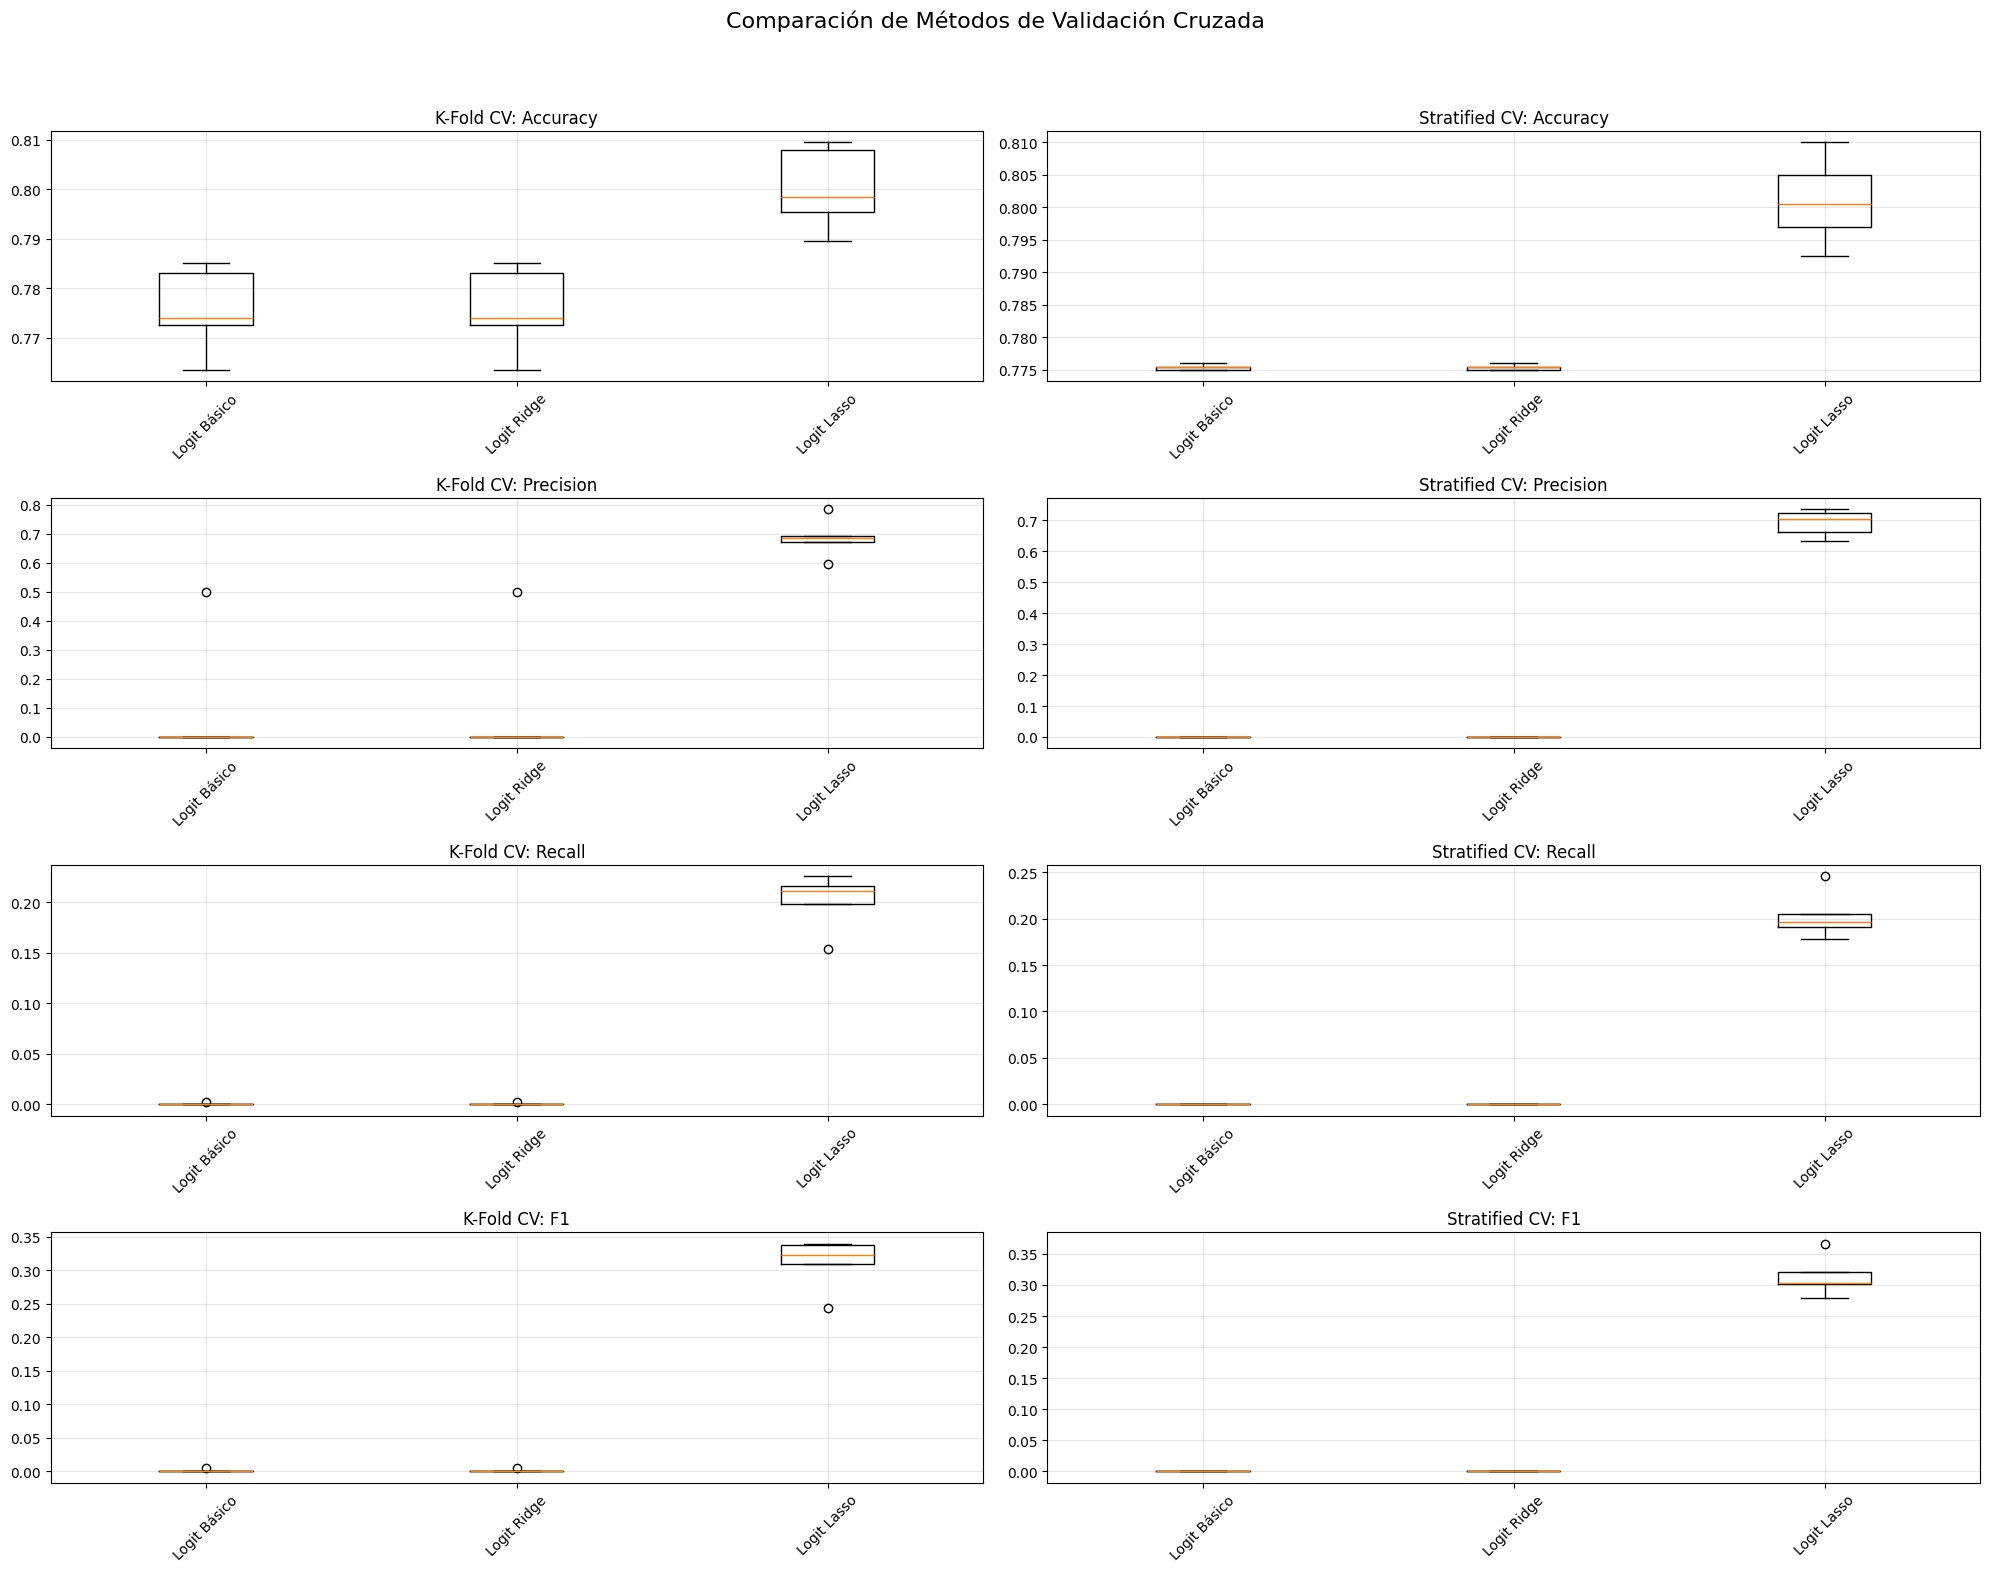


Generando curvas de aprendizaje...


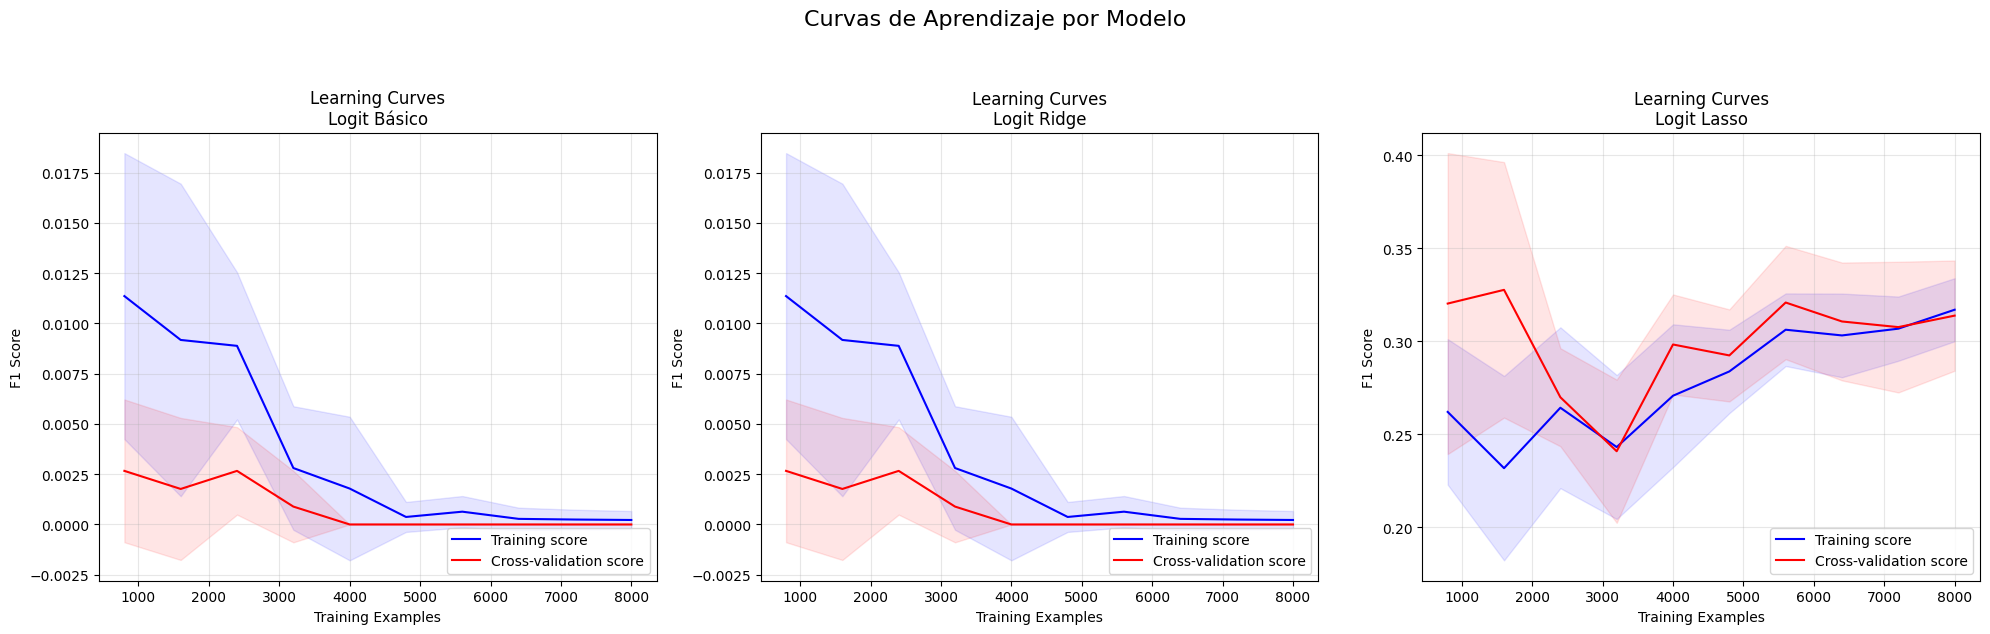


Resumen Estadístico:

Modelo: Logit Básico
Accuracy:
  Media: 0.7754
  Desv. Est.: 0.0004
Precision:
  Media: 0.0000
  Desv. Est.: 0.0000
Recall:
  Media: 0.0000
  Desv. Est.: 0.0000
F1:
  Media: 0.0000
  Desv. Est.: 0.0000

Modelo: Logit Ridge
Accuracy:
  Media: 0.7754
  Desv. Est.: 0.0004
Precision:
  Media: 0.0000
  Desv. Est.: 0.0000
Recall:
  Media: 0.0000
  Desv. Est.: 0.0000
F1:
  Media: 0.0000
  Desv. Est.: 0.0000

Modelo: Logit Lasso
Accuracy:
  Media: 0.8010
  Desv. Est.: 0.0061
Precision:
  Media: 0.6922
  Desv. Est.: 0.0382
Recall:
  Media: 0.2032
  Desv. Est.: 0.0228
F1:
  Media: 0.3138
  Desv. Est.: 0.0296


In [20]:
# 5. Análisis Completo
def perform_complete_cv_analysis(models, X, y):
    """
    Realiza un análisis completo de validación cruzada con visualizaciones mejoradas
    """
    # 1. Validación cruzada básica
    print("Realizando validación cruzada K-Fold...")
    kfold_results = perform_kfold_cv(models, X, y)

    # 2. Validación cruzada estratificada
    print("\nRealizando validación cruzada estratificada...")
    stratified_results = perform_stratified_cv(models, X, y)

    # 3. Visualizar resultados combinados
    print("\nGenerando visualizaciones comparativas...")
    plot_combined_cv_results(kfold_results, stratified_results)

    # 4. Curvas de aprendizaje
    print("\nGenerando curvas de aprendizaje...")
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    plot_all_learning_curves(models, X, y, cv)

    # 4. Resumen estadístico
    print("\nResumen Estadístico:")
    for name in models.keys():
        print(f"\nModelo: {name}")
        for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']:
            scores = stratified_results[name][metric]
            print(f"{metric.replace('test_', '').capitalize()}:")
            print(f"  Media: {scores.mean():.4f}")
            print(f"  Desv. Est.: {scores.std():.4f}")

# Ejemplo de uso
if __name__ == "__main__":
    # Asumiendo que ya tenemos models, X, y definidos
    perform_complete_cv_analysis(models, X, y)

# 📊 Análisis de Resultados en Predicción de Riesgo Crediticio

## 🎯 Introducción

En este análisis evaluamos tres modelos de regresión logística (Básico, Ridge y Lasso) para la predicción de default crediticio. Mediante la combinación de validación cruzada tradicional, validación estratificada y curvas de aprendizaje, buscamos comprender no solo la precisión de nuestros modelos, sino también su estabilidad y capacidad de generalización. Este enfoque integral nos permite tomar decisiones informadas sobre qué modelo implementar en un contexto real de evaluación de riesgo crediticio.

## 📈 Análisis de Validaciones Cruzadas

La evaluación mediante validación cruzada revela diferencias significativas entre nuestros modelos. **El modelo Lasso destaca claramente sobre los demás**, alcanzando un accuracy de 0.80 y una precision de 0.65-0.70, mientras que los modelos Básico y Ridge, a pesar de mostrar un accuracy aparentemente decente (0.77-0.78), **fallan completamente en identificar casos de default** con una precision y recall prácticamente nulos.

La implementación de la validación estratificada, que mantiene la proporción de defaults en cada fold, proporciona una imagen más clara y estable del rendimiento. **El modelo Lasso mantiene su superioridad** pero con métricas más consistentes, mientras que la validación estratificada confirma las limitaciones fundamentales de los modelos Básico y Ridge. Esta estabilidad en las métricas resulta especialmente valiosa considerando el desbalance inherente en nuestros datos de crédito.

## 📊 Curvas de Aprendizaje: Entendiendo el Comportamiento de los Modelos

Las curvas de aprendizaje nos revelan aspectos fundamentales sobre cómo aprenden nuestros modelos. Para los modelos Básico y Ridge, observamos un patrón preocupante: **las curvas muestran un descenso progresivo en el rendimiento**, y aunque las líneas de entrenamiento y validación están cercanas entre sí, esto solo confirma un **claro problema de underfitting**. La adición de más datos no mejora el rendimiento, sugiriendo limitaciones fundamentales en estos modelos.

El modelo Lasso muestra un comportamiento significativamente diferente y más prometedor. Sus curvas de aprendizaje se **estabilizan en niveles más altos** de rendimiento (F1-Score ~0.3-0.35), y la convergencia entre las curvas de entrenamiento y validación sugiere un **balance adecuado entre bias y varianza**. Es particularmente alentador ver que el modelo **mantiene y mejora su capacidad predictiva** con más datos, indicando potencial para optimizaciones adicionales.

## 💡 Conclusiones

A partir de este análisis integral, el modelo Lasso emerge claramente como la mejor opción para nuestro sistema de predicción de riesgo crediticio. No solo demuestra un mejor rendimiento en todas las métricas, sino que también muestra una capacidad real de aprendizaje y generalización. La validación estratificada debe ser nuestro método preferido de evaluación, dada su mayor confiabilidad con datos desbalanceados.

Para mejorar aún más el sistema, sería valioso enfocarse en optimizar los hiperparámetros del modelo Lasso y explorar técnicas adicionales para mejorar el recall sin comprometer la precision. También podría ser beneficioso recolectar más datos de casos de default y considerar técnicas de balanceo de clases. Estas mejoras podrían ayudar a construir un sistema más robusto y confiable para la evaluación de riesgo crediticio.